In [4]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [5]:
import os
import zipfile

# Make a .kaggle directory and move kaggle.json there
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

# Set the permissions
!chmod 600 /root/.kaggle/kaggle.json


In [6]:
!kaggle datasets download -d entenam/reddit-mental-health-dataset

Dataset URL: https://www.kaggle.com/datasets/entenam/reddit-mental-health-dataset
License(s): CC0-1.0
 98% 603M/617M [00:03<00:00, 147MB/s]
100% 617M/617M [00:03<00:00, 194MB/s]


In [7]:
!ls

reddit-mental-health-dataset.zip  sample_data


In [8]:
with zipfile.ZipFile("reddit-mental-health-dataset.zip","r") as zip_ref:
    zip_ref.extractall("")


In [10]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.4 MB/s eta 0:00:00


In [11]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 16.6 MB/s eta 0:00:00


In [12]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import contractions
from scipy.stats import zscore
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import emoji
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, precision_recall_curve, auc

In [6]:
data_set_path='Original Reddit Data'

main_folders=os.listdir(data_set_path)
main_folders

['raw data', 'Labelled Data']

In [7]:
labelled_Data_path=data_set_path+'/Labelled Data'

os.listdir(labelled_Data_path)

['LD EL1.csv',
 'LD TS 1.csv',
 'Meta Labelled data kaggel.rtf',
 'LD PF1.csv',
 'LD DA 1.csv']

In [4]:
df=None

In [8]:
for file in os.listdir(labelled_Data_path):
    file_path=labelled_Data_path+'/'+file
    if file_path.endswith('.csv'):
        df=pd.concat([df,pd.read_csv(file_path)])

In [9]:
df.head()

,score,selftext,subreddit,title,Label,CAT 1
0,1.0,Of Covid-19. Of 2021. Of not getting the vacci...,Anxiety,I'm scared,Early life,NaN
1,1.0,"i feel like im losing my mind, my health anxie...",Anxiety,experiencing fear so visceral i unlocked memor...,Early life,NaN
2,1.0,This year I’ve realized I really fear death. M...,Anxiety,Fear of dying significantly deteriorating my q...,Early life,NaN
3,1.0,Hiya~ There have been a couple teenagers at wo...,Anxiety,I’ve been harassed at work for a couple months...,Early life,NaN
4,1.0,"I need some advice. I have anxiety, and I have...",Anxiety,Why do I feel like I am constantly dying ?,Early life,NaN


In [10]:
df.shape

(823, 6)

In [11]:
df['subreddit'].value_counts()

,count
subreddit,
depression,277
Anxiety,187
mentalhealth,151
SuicideWatch,137
lonely,48


In [12]:
raw_data_path=data_set_path+'/'+main_folders[0]
raw_data_path

'Original Reddit Data/raw data'

In [13]:
os.listdir(raw_data_path)

['2021', '2019', '2022', '2020']

In [14]:
os.listdir(raw_data_path+'/2020')

['Feb20',
 'Aug 20',
 'Nov 20',
 'Sep 20',
 'Mar 20',
 'Jan 20',
 'Oct 20',
 'Dec 20',
 'May 20',
 'June 20',
 'Jul 20',
 'Apr 20']

In [15]:
os.listdir(raw_data_path+'/2020'+'/Apr 20')

['Mhapr20.csv',
 'depapr20.csv',
 'anxiapr20.csv',
 'Swapr20.csv',
 'loneapr20.csv']

In [16]:
pd.read_csv(raw_data_path+'/2020'+'/Apr 20'+'/Swapr20.csv')['subreddit'].value_counts().head(10)

,count
subreddit,
SuicideWatch,8966
:(,2
How do you talk to doctors?,1
"you ever feel like people are either people are acting stupid to hurt you, or they really just are?",1
Does anybody just wanna talk?,1
Anyone else get hit with that feeling as soon as they wake up?,1
Does anyone else feel like they're about die when they're falling asleep?,1
ALERT: YOU DON'T HAVE TO KILL YOURSELF! THERE'S A SOLUTION!,1
"I first ran for office in WV in 2018, then witnessing a shooting changed my life. My best friend died that night.",1


In [14]:
for year in os.listdir(raw_data_path):
    months_path=raw_data_path+'/'+year
    for month in os.listdir(months_path):
        files_path=months_path+'/'+month
        for file in os.listdir(files_path):
            if file.endswith('.csv'):
                file_path=files_path+'/'+file
                df_temp=pd.read_csv(file_path)
                if file[0].lower()=='a':
                    df_temp['subreddit']='Anxiety'
                elif file[0].lower()=='d':
                    df_temp['subreddit']='depression'
                elif file[0].lower()=='l':
                    df_temp['subreddit']='lonely'
                elif file[0].lower()=='s':
                    df_temp['subreddit']='SuicideWatch'
                elif file[0].lower()=='m':
                    df_temp['subreddit']='mentalhealth'

                # else store it as it
                df=pd.concat([df,df_temp])

In [15]:
del df_temp

In [19]:
df.shape

(1852403, 10)

In [20]:
df.head()

,score,selftext,subreddit,title,Label,CAT 1,Unnamed: 0,author,created_utc,timestamp
0,1.0,Of Covid-19. Of 2021. Of not getting the vacci...,Anxiety,I'm scared,Early life,NaN,NaN,NaN,NaN,NaN
1,1.0,"i feel like im losing my mind, my health anxie...",Anxiety,experiencing fear so visceral i unlocked memor...,Early life,NaN,NaN,NaN,NaN,NaN
2,1.0,This year I’ve realized I really fear death. M...,Anxiety,Fear of dying significantly deteriorating my q...,Early life,NaN,NaN,NaN,NaN,NaN
3,1.0,Hiya~ There have been a couple teenagers at wo...,Anxiety,I’ve been harassed at work for a couple months...,Early life,NaN,NaN,NaN,NaN,NaN
4,1.0,"I need some advice. I have anxiety, and I have...",Anxiety,Why do I feel like I am constantly dying ?,Early life,NaN,NaN,NaN,NaN,NaN


In [21]:
df['subreddit'].value_counts()

,count
subreddit,
depression,617617
SuicideWatch,493572
mentalhealth,303457
Anxiety,280325
lonely,157409


In [22]:
df.isnull().sum()

,0
score,23
selftext,54587
subreddit,23
title,31
Label,1851603
CAT 1,1852203
Unnamed: 0,823
author,823
created_utc,823
timestamp,823


In [23]:
len(df['title'].unique())

1493990

In [24]:
df['title'].duplicated().sum()

np.int64(358413)

In [16]:
df=df[['selftext','subreddit']]

In [17]:
df.head()

,selftext,subreddit
0,Of Covid-19. Of 2021. Of not getting the vacci...,Anxiety
1,"i feel like im losing my mind, my health anxie...",Anxiety
2,This year I’ve realized I really fear death. M...,Anxiety
3,Hiya~ There have been a couple teenagers at wo...,Anxiety
4,"I need some advice. I have anxiety, and I have...",Anxiety


In [18]:
encoded_subreddit={'mentalhealth':0,'Anxiety':1,'depression':2,'SuicideWatch':3,'lonely':4}

In [19]:
import numpy as np
def convert_empty(text):
    text=str(text)
    text=text.strip()
    if len(text)==0:
        text=np.nan
    return text

In [20]:
test=df['selftext'].copy()

In [21]:
test=test.apply(convert_empty)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852403 entries, 0 to 3020
Data columns (total 2 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   selftext   object
 1   subreddit  object
dtypes: object(2)
memory usage: 42.4+ MB


In [22]:
test.isnull().sum()

np.int64(14)

In [23]:
df['selftext']=test

In [24]:
df.isnull().sum()

,0
selftext,14
subreddit,23


In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum()

,0
selftext,0
subreddit,0


In [27]:
df.duplicated().sum()

np.int64(270548)

In [28]:
df.drop_duplicates(inplace=True)

In [39]:
df.describe().T

,count,unique,top,freq
selftext,1581818,1560380,please,5
subreddit,1581818,5,depression,514657


In [40]:
df.shape

(1581818, 2)

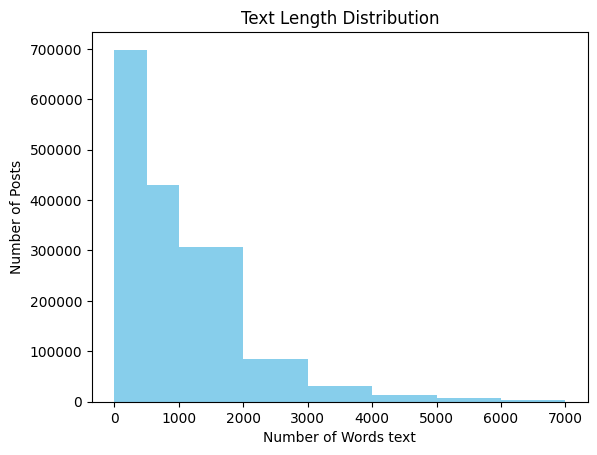

In [47]:
df['text_length'] = df['selftext'].apply(len)

plt.hist(df['text_length'], bins=[0,500,1000,2000,3000,4000,5000,6000,7000], color='skyblue')
plt.title("Text Length Distribution")
plt.xlabel("Number of Words text")
plt.ylabel("Number of Posts")
plt.show()

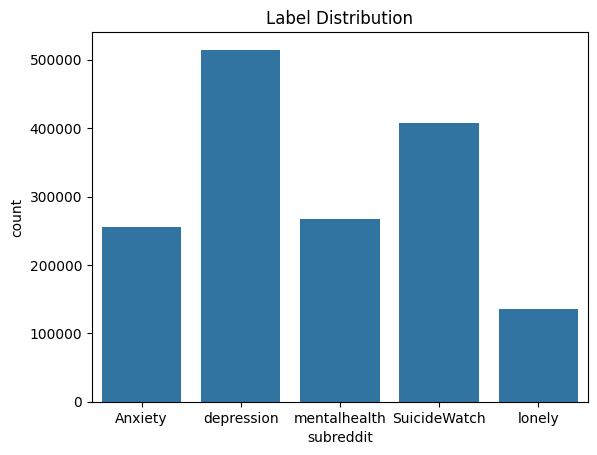

In [48]:
sns.countplot(x='subreddit', data=df)
plt.title("Label Distribution")
plt.show()

### Our dataset is imbalaced

In [49]:
EN_stopwords=stopwords.words('english')

for i in range(len(EN_stopwords)):
    word=contractions.fix(EN_stopwords[i])
    word=word.replace('not','').strip()
    EN_stopwords[i]=word


In [50]:
EN_stopwords=set(EN_stopwords)

In [51]:
len(EN_stopwords)

186

In [52]:
print(EN_stopwords)

{'', 'ma', 'i have', 'weren', 'other', 'i will', 'same', 'didn', 'i would', 'yourselves', 'he will', 'need', 'so', 'for', 'm', 'than', 'up', 'wasn', 'you have', 'doesn', 'ain', 'with', 'their', 'myself', 'few', 'all', 'them', 'd', 'too', 'yourself', 'or', 'might', 'where', 'who', 'down', 've', 'nor', 'after', 'just', 'was', 'aren', 'you', 'there', 'while', 'theirs', 'each', 'into', 'then', 'hasn', 'i am', 'when', 'once', 'we have', 'mustn', 'through', 'during', 'they have', 'yours', 'whom', 'more', 'as', 'hers', 'how', 'by', 'themselves', 'its', 'don', 'you are', 'but', 'haven', 'of', 's', 'are', 'between', 'that', 'do', 'she is', 'why', 'off', 'did', 'needn', 'your', 'about', 'both', 'am', 'ours', 'again', 'now', 'being', 'it would', 'it is', 'here', 'her', 'no', 'the', 'shall', 'you would', 'he is', 'most', 'that will', 'couldn', 'won', 'we would', 'were', 'from', 'y', 'to', 'what', 'mightn', 'll', 'until', 'if', 't', 'o', 'they will', 'under', 'me', 'this', 'we', 'a', 'we will', 'do

In [53]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

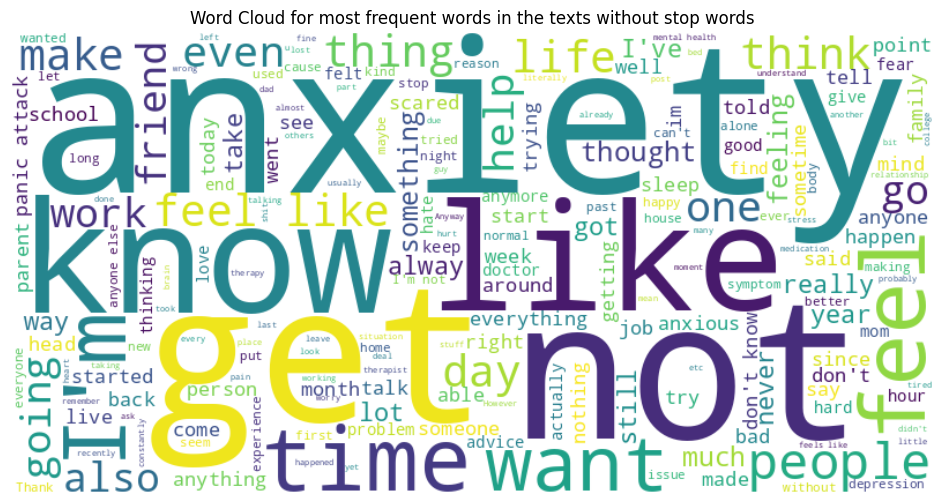

In [54]:
sample_text = ' '.join(df['selftext'].head(10000))

wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=EN_stopwords).generate(sample_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for most frequent words in the texts without stop words")
plt.show()


In [55]:
df['subreddit'].value_counts()

,count
subreddit,
depression,514657
SuicideWatch,407817
mentalhealth,267696
Anxiety,255539
lonely,136109


In [56]:
df['subreddit'].value_counts(normalize=True)*100

,proportion
subreddit,
depression,32.535791
SuicideWatch,25.781537
mentalhealth,16.923312
Anxiety,16.154766
lonely,8.604593


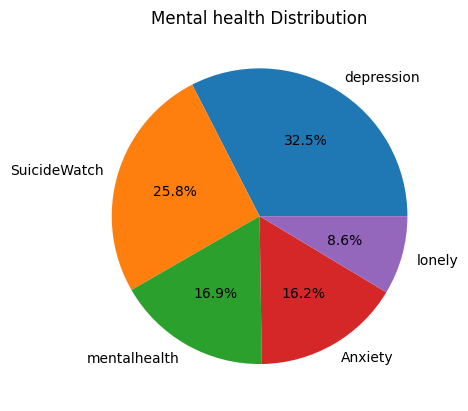

In [57]:
df['subreddit'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Mental health Distribution')
plt.ylabel('')  # Hide y-label
plt.show()

In [58]:
def preprocess(text):

    text=text.split()

    # contractions
    for i in range(len(text)):
       text[i]=contractions.fix(text[i])

    text=' '.join(text)

    # remove numbers
    text = re.sub(r'\d+', '', text)

    # remove mentions if found
    text=re.sub(r'@[\w.]+\b','',text)

    # replace emojis with it's meaning
    text = emoji.demojize(text)

    # delete repeated characters
    text = re.sub(r'(.)\1+', r'\1', text)

    # tokenization
    tokens=word_tokenize(text)

    filered_tokens=[]

    lemm=SnowballStemmer(language='english')

    # delete punctiations and unneeded stopwords and lemmetization
    for word in tokens:
        word=word.lower().strip()
        if word in EN_stopwords or word in string.punctuation:
            continue
        filered_tokens.append(lemm.stem(word))

    text=' '.join(filered_tokens)

    # delete extra sapces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [71]:
test=df['selftext'].copy()

In [59]:
df['selftext'].head()

,selftext
0,Of Covid-19. Of 2021. Of not getting the vacci...
1,"i feel like im losing my mind, my health anxie..."
2,This year I’ve realized I really fear death. M...
3,Hiya~ There have been a couple teenagers at wo...
4,"I need some advice. I have anxiety, and I have..."


In [76]:
# test=test.apply(preprocess)

tttgfd
ffff

the
nbbb


In [29]:
  # percent of punctuations
df['punctuation_count'] = df['selftext'].apply(lambda x: sum(1 for c in x if c in string.punctuation)/len(x))

  # percent of captilized characters
df['capital_count'] = df['selftext'].apply(lambda x: sum(1 for c in x if c.isupper())/len(x))

  # percent of digits
df['digit_count'] = df['selftext'].apply(lambda x: sum(1 for c in x if c.isdigit())/len(x))

  # percent of emojis
df['number_emojis'] = df['selftext'].apply(lambda x: sum(1 for c in x if c in emoji.EMOJI_DATA)/len(x))

In [78]:
# df['selftext']=test

In [65]:
df.head()

,selftext,subreddit,text_length,punctuation_count,capital_count,digit_count,number_emojis
0,Of Covid-19. Of 2021. Of not getting the vacci...,Anxiety,129,6,7,6,0
1,"i feel like im losing my mind, my health anxie...",Anxiety,609,12,0,0,0
2,This year I’ve realized I really fear death. M...,Anxiety,397,6,10,1,0
3,Hiya~ There have been a couple teenagers at wo...,Anxiety,535,9,9,2,0
4,"I need some advice. I have anxiety, and I have...",Anxiety,832,33,20,3,0


In [80]:
del test

In [81]:
df.to_csv('dataset.csv', index=False)

In [66]:
!ls

 dataset.csv		 reddit-mental-health-dataset.zip
'Original Reddit Data'	 sample_data


In [83]:
from google.colab import files
files.download('dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
df_processed=pd.read_csv('dataset.csv')

In [69]:
df_processed.shape

(1581818, 3)

In [34]:
df_processed['punctuation_count']=df['punctuation_count'].values*100
df_processed['capital_count']=df['capital_count'].values*100
df_processed['digit_count']=df['digit_count'].values*100
df_processed['number_emojis']=df['number_emojis'].values*100

In [35]:
df_processed.head()

,selftext,subreddit,text_length,punctuation_count,capital_count,digit_count,number_emojis
0,covid- not gete vacin son enough wish held lik...,Anxiety,129,4.651163,5.426357,4.651163,0.0
1,fel like lose mind health anxieti skyrocket le...,Anxiety,609,1.970443,0.000000,0.000000,0.0
2,year realiz reali fear death mother pase away ...,Anxiety,397,1.511335,2.518892,0.251889,0.0
3,hiya~ ben coupl tenag work hara buli not mind ...,Anxiety,535,1.682243,1.682243,0.373832,0.0
4,ned advic anxieti sufer childhod trauma therap...,Anxiety,832,3.966346,2.403846,0.360577,0.0


In [36]:
df_processed.shape

(1581818, 7)

In [83]:
df.shape

(1581818, 7)

In [37]:
df_processed['subreddit']=df_processed['subreddit'].map(encoded_subreddit)

<Axes: >

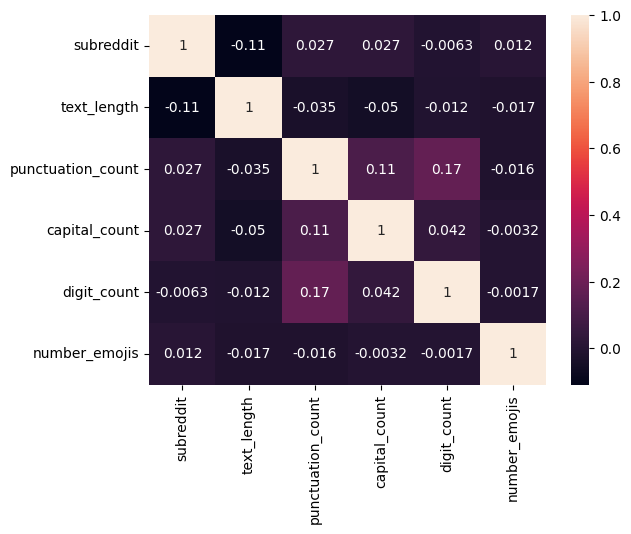

In [38]:
sns.heatmap(df_processed.drop('selftext',axis=1).corr(),annot=True)

In [96]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm
tqdm.pandas()

sia = SentimentIntensityAnalyzer()

hi there

In [97]:
def get_sentiment_scores(text):
    scores = sia.polarity_scores(text)
    return pd.Series([scores['neg'], scores['neu'], scores['pos'], scores['compound']])



In [98]:
df[['neg_sentiment', 'neu_sentiment', 'pos_sentiment', 'compound_sentiment']] = df['selftext'].progress_apply(get_sentiment_scores)

100%|██████████| 1581818/1581818 [57:20<00:00, 459.81it/s]


hiii suii
fff

In [100]:
df.head()

,selftext,subreddit,text_length,punctuation_count,capital_count,digit_count,number_emojis,neg_sentiment,neu_sentiment,pos_sentiment,compound_sentiment
0,Of Covid-19. Of 2021. Of not getting the vacci...,Anxiety,129,6,7,6,0,0.098,0.642,0.260,0.5859
1,"i feel like im losing my mind, my health anxie...",Anxiety,609,12,0,0,0,0.287,0.644,0.069,-0.9699
2,This year I’ve realized I really fear death. M...,Anxiety,397,6,10,1,0,0.158,0.812,0.030,-0.8066
3,Hiya~ There have been a couple teenagers at wo...,Anxiety,535,9,9,2,0,0.180,0.657,0.163,-0.4939
4,"I need some advice. I have anxiety, and I have...",Anxiety,832,33,20,3,0,0.261,0.666,0.073,-0.9876


In [101]:
df_processed['neg_sentiment']=df['neg_sentiment'].values
df_processed['neu_sentiment']=df['neu_sentiment'].values
df_processed['pos_sentiment']=df['pos_sentiment'].values
df_processed['compound_sentiment']=df['compound_sentiment'].values

In [103]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
subreddit,1581818.0,1.929893,1.198151,0.0,1.0000,2.0000,3.0000,4.0
text_length,1581818.0,891.463015,1105.837170,1.0,279.0000,581.0000,1108.0000,39999.0
punctuation_count,1581818.0,23.854404,36.668668,0.0,6.0000,14.0000,29.0000,8658.0
capital_count,1581818.0,21.253970,87.031394,0.0,5.0000,13.0000,26.0000,38612.0
digit_count,1581818.0,2.241935,6.952702,0.0,0.0000,0.0000,2.0000,2131.0
number_emojis,1581818.0,0.044896,1.274252,0.0,0.0000,0.0000,0.0000,943.0
neg_sentiment,1581818.0,0.162213,0.095750,0.0,0.1030,0.1540,0.2110,1.0
neu_sentiment,1581818.0,0.715235,0.107922,0.0,0.6570,0.7180,0.7780,1.0
pos_sentiment,1581818.0,0.122371,0.081488,0.0,0.0720,0.1140,0.1610,1.0
compound_sentiment,1581818.0,-0.256594,0.740633,-1.0,-0.9371,-0.5883,0.5023,1.0


In [3]:
from google.colab import files
files.download('final dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
df_processed=pd.read_csv('final dataset.csv')

<Axes: >

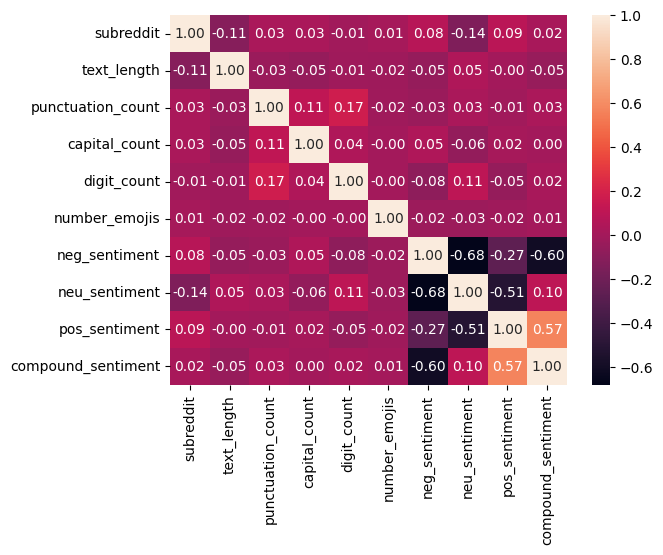

In [4]:
sns.heatmap(df_processed.drop('selftext',axis=1).corr(),annot=True,fmt='.2f')

In [3]:
df_processed.dropna(inplace=True)

In [4]:
X=df_processed[['selftext','text_length','neu_sentiment']]
Y=df_processed['subreddit']

In [7]:
Y.head()

,subreddit
0,1
1,1
2,1
3,1
4,1


In [6]:
x_sample,_,y_sample,_=train_test_split(X,Y,stratify=Y,random_state=42,train_size=0.33)

In [7]:
x_sample.head()

,selftext,text_length,neu_sentiment
1286754,hate adult think live hous eat fod not depres ...,546,0.746
1128222,f. disgust inabl take import decis life not wa...,485,0.878
661121,wish not coward wish not exist make life worth...,93,0.506
195617,use suicid year eventuali becam numb pain life...,441,0.776
827030,god friend mine not even rememb one wil end do...,113,0.707


In [8]:
y_sample.head()

,subreddit
1286754,2
1128222,2
661121,3
195617,3
827030,3


In [7]:
x_train,x_test,y_train,y_test=train_test_split(x_sample,y_sample,train_size=0.8,stratify=y_sample,random_state=42)

In [7]:
del df_processed,x_sample,y_sample

In [11]:
bigram=CountVectorizer(ngram_range=(1,2),max_features=8_000)

In [9]:
import joblib

In [10]:
model = joblib.load(r'C:\Users\kiril\Downloads\bigram_vectorizer_reddit MH.pkl')


In [12]:
x_train_tfidf=bigram.fit_transform(x_train['selftext'])

In [14]:
x_test_tfidf=bigram.transform(x_test['selftext'])

In [11]:
x_train_tfidf=model.transform(x_train['selftext'])
x_test_tfidf=model.transform(x_test['selftext'])

In [15]:
import joblib

# Save the vectorizer
joblib.dump(bigram, 'bigram_vectorizer_reddit MH.pkl')

['bigram_vectorizer_reddit MH.pkl']

In [16]:
!ls

'bigram_vectorizer_reddit MH.pkl'  'Original Reddit Data'
 dataset.csv			    reddit-mental-health-dataset.zip
'final dataset.csv'		    sample_data
'final processed dataset.csv'


In [12]:
from sklearn.preprocessing import StandardScaler,minmax_scale

scaler=StandardScaler()

x_train_numirec=scaler.fit_transform(x_train.drop('selftext',axis=1))

In [13]:
x_test_numirec=scaler.transform(x_test.drop('selftext',axis=1))

In [14]:
from scipy.sparse import hstack
from scipy.sparse import csr_matrix

X_train_combined = hstack([x_train_tfidf, csr_matrix(x_train_numirec)])
X_test_combined = hstack([x_test_tfidf, csr_matrix(x_test_numirec)])

### Logistic regression

In [ ]:
param_grid= {
    'C': [0.01],  # Regularization strength
    'solver': ['saga', 'lbfgs'],  # Solvers to try
    'multi_class': ['ovr']  # Multi-class strategy
}

logreg = LogisticRegression(max_iter=1000)
grid_searchLog=GridSearchCV(estimator=logreg,param_grid=param_grid,cv=2,scoring='accuracy',refit='accuracy',n_jobs=1)
grid_searchLog.fit(X_train_combined,y_train)

f:\AI\anaconda_envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
f:\AI\anaconda_envs\NLP\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
f:\AI\anaconda_envs\NLP\Lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


### support vector machine

In [ ]:
svm_model = SVC(max_iter=1000,class_weight='balanced')

svm_model.fit(X_train_combined,y_train)

# Set up GridSearchCV
# grid_search_SVC = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=2, scoring='accuracy', refit='accuracy', n_jobs=-1)

# Fit the grid search
# grid_search_SVC.fit(x_train, y_train)

# # Print the best parameters and the best score
# print("Best parameters found: ", grid_search_SVC.best_params_)
# print("Best score: ", grid_search_SVC.best_score_)

### Random forest

In [31]:
y_pre=svm_model.predict(X_test_combined)

In [32]:
accuracy_score(y_pre,y_test)

0.08594596148869485

In [ ]:
# Define the RandomForest model
rf_model = RandomForestClassifier(class_weight='balanced',max_depth=20)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100,50],  # Number of trees in the forest
    'max_features': ['auto', 'log2'],  # Number of features to consider for the best split
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=2, scoring='accuracy', refit='accuracy', n_jobs=-1)

# Fit the grid search
grid_search_rf.fit(X_train_combined, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search_rf.best_params_)
print("Best score: ", grid_search_rf.best_score_)